# **<font color=#ff7400> Digit Recognition</font>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### **<font color=#ff7400> A. Data Exploration </font>**

Let's start by having a quick look at our data and try to understand it better.

#### **<font color=#ff7400> A.1 Dataset Overview </font>**

In [2]:
data = "../data/digit-recognizer"

df = pd.read_csv(os.path.join(data, "train.csv"))

In [3]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns. Here are the first 5 rows:")
df.head(5)

Dataset has 42000 rows and 785 columns. Here are the first 5 rows:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = sorted(list(df["label"].unique()))

print(f"Here are the labels from the dataset: {labels}")

Here are the labels from the dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


At first sight, we can see that we have a dataset made of 42 000 rows, with each row corresponding to a picture. Each row is composed of 785 columns. 

The first column corresponds to the label when the rest are the pixels composing the picture. With only an overview of the first 5 rows, we can notice some pixels have a value of zero. 

Let's try to extract some more insights:

In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


As we can see we have many rows with values equal to zero. We should check how many of our columns are impacted by this: 

In [6]:
threshold = 0.0
zero_counts = df.iloc[:, 1:].apply(lambda col: (col == threshold).sum())
non_zeros_columns = []

for index, value in zero_counts.items():
    percentage = (value / 42000) * 100
    if percentage < 50.0:
        non_zeros_columns.append(index)

print(f"{len(non_zeros_columns)} columns have values which are not always null. This represents ({round((len(non_zeros_columns)/df.shape[1]) * 100, 2)}% of the dataset.)")


139 columns have values which are not always null. This represents (17.71% of the dataset.)


So out of 785 columns, only 139 have pixels with values greater than 0. When moving to classification, we will probably be able to drop those columns.

#### **<font color=#ff7400> A.2 Images Visualization </font>**

Now, let's plot some of this images to see what it represents.

In [7]:
df = df.sort_values(by=["label"]) # sorting dataset by labels so next loop can iterate faster

In [8]:
labels_to_do = sorted(list(df["label"].unique()))
images_labels = []
images_indexes = []

while len(labels_to_do) > 0:
    for index, row in df.iterrows():
        if row["label"] not in images_labels:
            images_labels.append(row["label"])
            images_indexes.append(index)
            labels_to_do.remove(row["label"])


/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1426/2072798545.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(f'Image for label: {row[0]}')


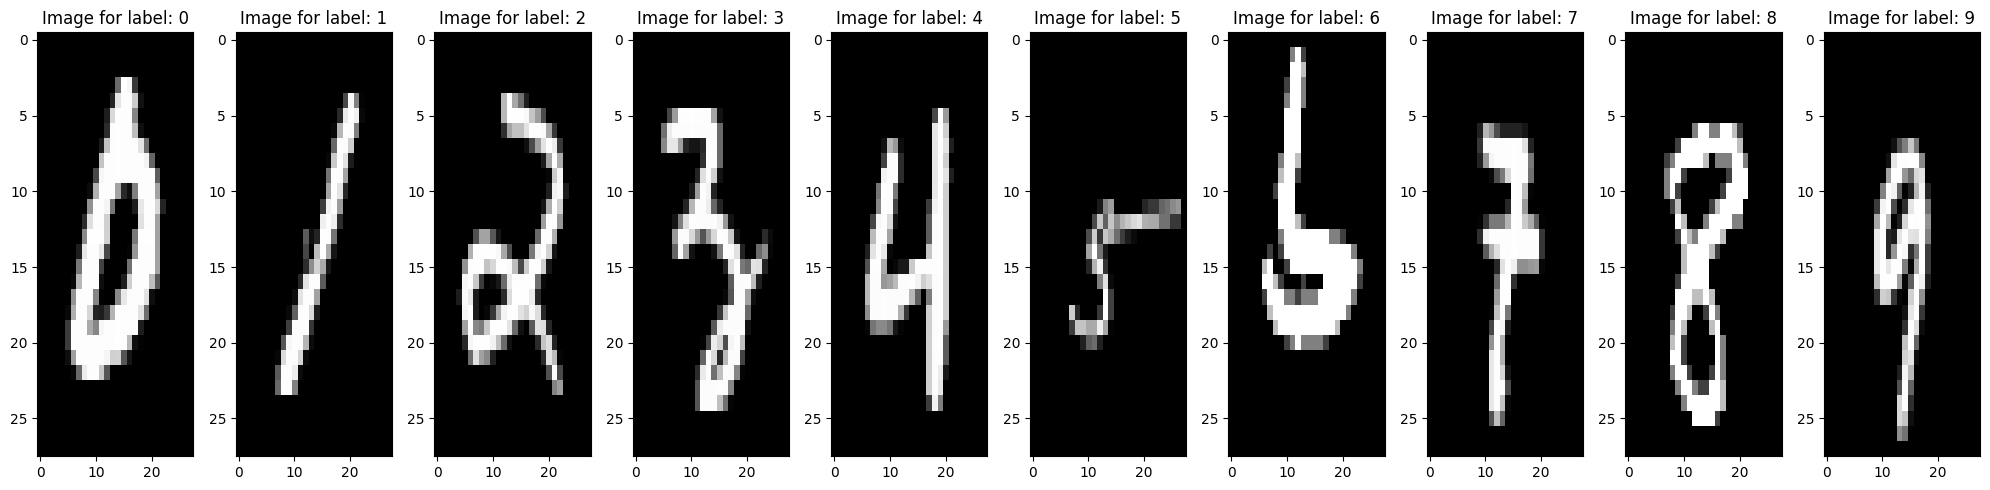

In [9]:
num_subplots = len(images_labels)

fig, axs = plt.subplots(1, num_subplots, figsize=(20, 5))

for ax, index in zip(axs, images_indexes):
    row = df.loc[index]
    image_data = row[1:].values.reshape(28, 28) # I am removing label so image is of size 784 and can be reshaped properly
    ax.imshow(image_data, cmap='gray', aspect='auto')
    ax.set_title(f'Image for label: {row[0]}')

plt.tight_layout()
plt.show()

Now, this makes more sense of why so many pixels have a value set to 0: this corresponds to the black area around the digit, where there is no information. Our main task therefore will be to predict the digit on the picture using the pixels information we have at our disposal.

#### **<font color=#ff7400> A.3 Check Balance of Classes </font>**

Text(0, 0.5, 'Occurences')

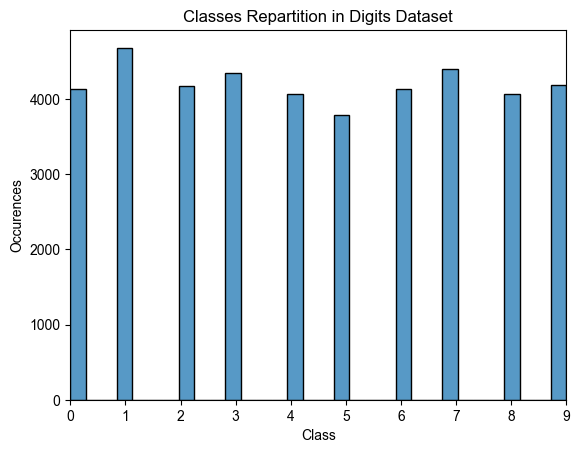

In [10]:
plt.plot()
sns.histplot(data=df["label"])
sns.set_theme(rc={'figure.figsize':(10.7,8)})
plt.title("Classes Repartition in Digits Dataset")
plt.xlim(0,9)
plt.xlabel("Class")
plt.ylabel("Occurences")

As we can see from this graph, classes are fairly distributed with approximately 4000 occurences for each class. Except for the digit number 5, for which we are below the 4000 count. This is something we should remember as the model might face difficulties to perfectly differentiate this class from the others.

### **<font color=#ff7400> B. Modelization </font>**

In this part we will focus on building an algorithm to predict the digit figuring on a picture. We will first try to compare the performance using "simple" models, before moving to more advance ones (Deep Learning).

#### **<font color=#ff7400> B.1 Logistic Regression </font>**

We will first start with a Logistic Regression using a Softmax function to try to classify our images. This will be our base model. Then, we will compare its performance with a more advanced Deep Learning algorithm.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
y = df['label']
X = df.drop(columns=['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# we standardize features by using the StandardScaler from sklearn (z-score to center data around 0 and improve convergence of the model)
pipe_log_reg = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000))
pipe_log_reg.fit(X_train, y_train)

print(f"This is the accuracy for the train data: {pipe_log_reg.score(X_train, y_train)}")
print(f"This is the accuracy for the test data: {pipe_log_reg.score(X_test, y_test)}")

This is the accuracy for the train data: 0.9623469387755103
This is the accuracy for the test data: 0.9010317460317461


In [14]:
log_accuracy = pipe_log_reg.score(X_test, y_test)

In [15]:
y_pred_train = pipe_log_reg.predict(X_train)  
y_pred_test = pipe_log_reg.predict(X_test)
print("Here is the classification report for the train:")
print(classification_report(y_train, y_pred_train))

Here is the classification report for the train:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2855
           1       0.98      0.99      0.99      3228
           2       0.96      0.96      0.96      2924
           3       0.94      0.94      0.94      3087
           4       0.97      0.97      0.97      2857
           5       0.94      0.94      0.94      2655
           6       0.98      0.99      0.98      2951
           7       0.97      0.96      0.97      3100
           8       0.94      0.93      0.94      2799
           9       0.94      0.95      0.95      2944

    accuracy                           0.96     29400
   macro avg       0.96      0.96      0.96     29400
weighted avg       0.96      0.96      0.96     29400



In [16]:
print("Here is the classification report for the test:")
print(classification_report(y_test, y_pred_test))

Here is the classification report for the test:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1277
           1       0.95      0.97      0.96      1456
           2       0.90      0.87      0.88      1253
           3       0.86      0.88      0.87      1264
           4       0.90      0.90      0.90      1215
           5       0.87      0.84      0.85      1140
           6       0.93      0.94      0.94      1186
           7       0.92      0.91      0.91      1301
           8       0.87      0.86      0.86      1264
           9       0.87      0.88      0.87      1244

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



If we are looking at the performance of our model, the precision is not too bad with an average score of 0.9. Model seems to perform especially well to classify 0, 1, 6 and 7.
As for the recall, we don't see any big gap among the feature. Worth mentionning the class 5 for which we seem to slightly underperform compared to other classes, which makes sense following our observations during our EDA.

It would be interesting to investigate which classes our model is struggling the most to predict. We can plot the confusion matrix in order to do so: 

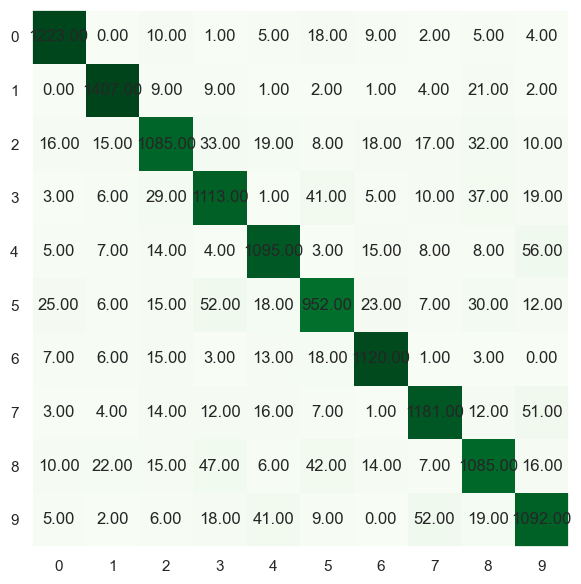

In [17]:
cm = confusion_matrix(y_test, y_pred_test)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm_normalized, cmap=plt.cm.Greens)

class_labels = np.unique(y_test)

ax.grid(False)
ax.xaxis.set(ticks=np.arange(len(class_labels)), ticklabels=class_labels)
ax.yaxis.set(ticks=np.arange(len(class_labels)), ticklabels=class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        ax.text(j, i, f"{cm[i, j]:.2f}", ha='center', va='center')

fig.tight_layout()
plt.show()

According to those results, it looks like our model is confusing most of the time:
- 0 with 5
- 1 with 8
- 2 with 3
- 3 with 5 and 8
- 4 with 9
- 5 with 3
- 6 with 5
- 7 with 9
- 8 with 3
- 9 with 7

As the digits have been written by hand, we clearly see some imperfections: the zero is not perfectly round, the 3 seems to have some kind of lower loop, etc. (see plot below). It is probable that not all samples are perfectly written and therefore the model is struggling to learn some boundaries for our digits.

/var/folders/x9/wfxfy30n21j10t1dqkkhfjjm0000gn/T/ipykernel_1426/1522606205.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(f'Image for label: {row[0]}')


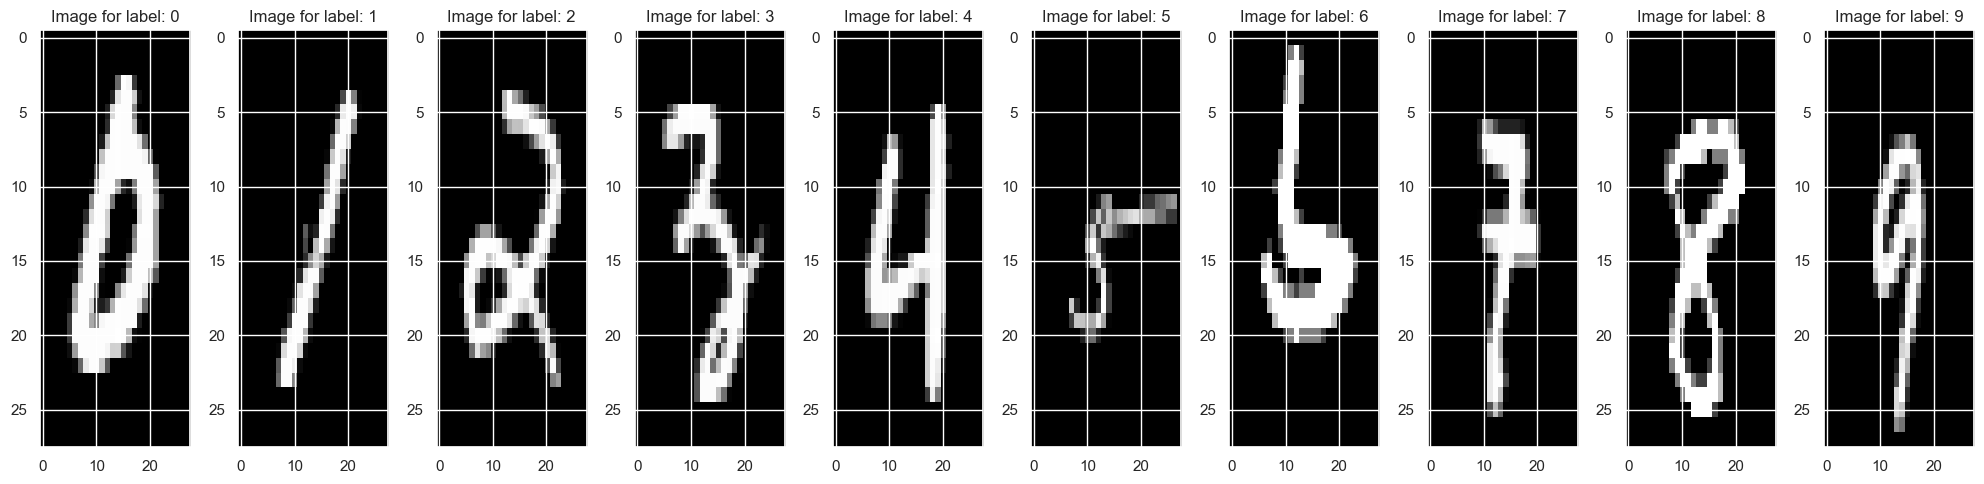

In [18]:
num_subplots = len(images_labels)

fig, axs = plt.subplots(1, num_subplots, figsize=(20, 5))

for ax, index in zip(axs, images_indexes):
    row = df.loc[index]
    image_data = row[1:].values.reshape(28, 28)
    ax.imshow(image_data, cmap='gray', aspect='auto')
    ax.set_title(f'Image for label: {row[0]}')

plt.tight_layout()
plt.show()

#### **<font color=#ff7400> B.2 Build a CNN with TensorFlow </font>**

In [19]:
X_train.shape

(29400, 784)

In [20]:
X_test.shape

(12600, 784)

In [21]:
X_train.iloc[0].shape

(784,)

In [22]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
X_test.shape

(12600, 28, 28, 1)

In [24]:
X_test[0].shape

(28, 28, 1)

In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [26]:
my_CNN = models.Sequential()

my_CNN.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
my_CNN.add(layers.MaxPooling2D((2, 2)))
my_CNN.add(layers.Flatten())
my_CNN.add(layers.Dense(32, activation="relu"))
my_CNN.add(layers.Dense(10))

cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

my_CNN.compile(optimizer="adam",
            loss=cross_entropy,
            metrics=["accuracy"])

/Users/julien/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-05 10:12:43.331009: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-06-05 10:12:43.331026: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-06-05 10:12:43.331032: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-06-05 10:12:43.331215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-05 10:12:43.331230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_

In [27]:
history = my_CNN.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


2024-06-05 10:12:43.776201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4620 - loss: 2.5833 - val_accuracy: 0.6399 - val_loss: 0.9344
Epoch 2/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7491 - loss: 0.7581 - val_accuracy: 0.9190 - val_loss: 0.3429
Epoch 3/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9350 - loss: 0.2530 - val_accuracy: 0.9582 - val_loss: 0.1718
Epoch 4/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9674 - loss: 0.1147 - val_accuracy: 0.9630 - val_loss: 0.1430
Epoch 5/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9767 - loss: 0.0788 - val_accuracy: 0.9624 - val_loss: 0.1529
Epoch 6/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9793 - loss: 0.0658 - val_accuracy: 0.9629 - val_loss: 0.1509
Epoch 7/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9818 - loss: 0.0616 - val_accuracy: 0.9660 - val_loss: 0.1495
Epoch 8/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9656 - val_

In [28]:
tf_accuracy = my_CNN.evaluate(X_test,  y_test, verbose=2)

394/394 - 1s - 2ms/step - accuracy: 0.9661 - loss: 0.2462


In [29]:
print(f"Test accuracy for Logistic Regression is: {round(log_accuracy, 3)}")
print(f"Test accuracy for CNN is: {round(tf_accuracy[1], 3)}")

Test accuracy for Logistic Regression is: 0.901
Test accuracy for CNN is: 0.966


As we can see, the accuracy for our CNN is 7 points higher than for the Logistic Regression. So it seems our CNN performs better than our base model. However, such a high accuracy might be a first indicator of overfitting. Let's plot our train and test losses:

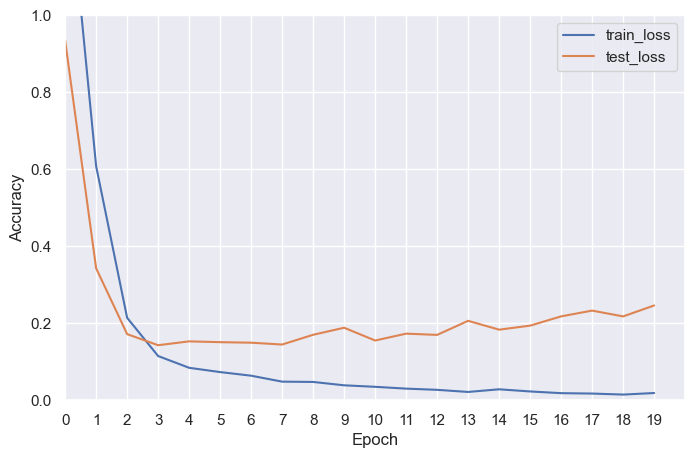

In [30]:
epochs = range(20)

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label = "test_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.legend(loc="upper right")
plt.show()

By plotting it is now very obvious that our model is overfitting: after 3 epochs, the test curve goes above the train, and the gap is getting bigger and bigger at each epoch.

We will try to regularize our model. Code is adapted from the Regularizers [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers).

In [31]:
from tensorflow.keras import regularizers

my_CNN = models.Sequential()
my_CNN.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
my_CNN.add(layers.MaxPooling2D((2, 2)))
my_CNN.add(layers.Flatten())
my_CNN.add(layers.Dense(32, activation="relu", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
my_CNN.add(layers.Dense(10, activation="softmax"))

cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

my_CNN.compile(optimizer='adam',
            loss=cross_entropy,
            metrics=['accuracy'])

In [32]:
history = my_CNN.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/Users/julien/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6120 - loss: 1.9293 - val_accuracy: 0.9304 - val_loss: 0.3003
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9429 - loss: 0.2301 - val_accuracy: 0.9540 - val_loss: 0.2006
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9714 - loss: 0.1272 - val_accuracy: 0.9608 - val_loss: 0.1829
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9779 - loss: 0.0994 - val_accuracy: 0.9694 - val_loss: 0.1524
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9854 - loss: 0.0760 - val_accuracy: 0.9715 - val_loss: 0.1529
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9892 - loss: 0.0670 - val_accuracy: 0.9665 - val_loss: 0.1871
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9889 - loss: 0.0675 - val_accuracy: 0.9681 - val_loss: 0.1709
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9919 - loss: 0.0580 - val_accuracy: 0.9716 - val_

In [33]:
tf_accuracy = my_CNN.evaluate(X_test,  y_test, verbose=2)
print(f"Test accuracy for Logistic Regression is: {round(log_accuracy, 3)}")
print(f"Test accuracy for CNN is: {round(tf_accuracy[1], 3)}")

394/394 - 1s - 3ms/step - accuracy: 0.9721 - loss: 0.1739
Test accuracy for Logistic Regression is: 0.901
Test accuracy for CNN is: 0.972


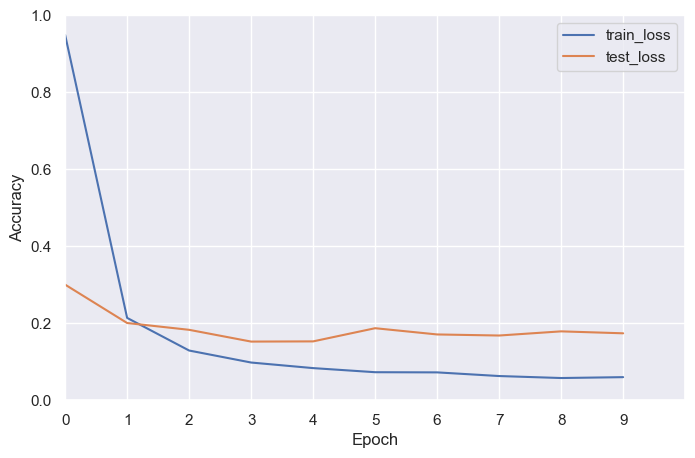

In [34]:
epochs = range(10)

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label = "test_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.xlim([0, 10])
plt.ylim([0, 1])
plt.legend(loc="upper right")
plt.show()

No luck. Let's try by applying some dropout (setting hidden units to 0) and see if that works. Code for this part was adapted from the Tensorflow official documentation [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

In [35]:
# CNN with dropout

my_CNN = models.Sequential()

my_CNN.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
my_CNN.add(layers.MaxPooling2D((2, 2)))
my_CNN.add(layers.Flatten())
my_CNN.add(layers.Dense(32, activation="relu"))
my_CNN.add(layers.Dropout(rate=0.1))
my_CNN.add(layers.Dense(10, activation="softmax"))

cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

my_CNN.compile(optimizer='adam',
            loss=cross_entropy,
            metrics=['accuracy'])

In [36]:
history = my_CNN.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3208 - loss: 2.9441 - val_accuracy: 0.6059 - val_loss: 1.1104
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5867 - loss: 1.1179 - val_accuracy: 0.8971 - val_loss: 0.4979
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8341 - loss: 0.5739 - val_accuracy: 0.9363 - val_loss: 0.2397
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8934 - loss: 0.3215 - val_accuracy: 0.9531 - val_loss: 0.1810
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9200 - loss: 0.2478 - val_accuracy: 0.9570 - val_loss: 0.1714
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9364 - loss: 0.1942 - val_accuracy: 0.9623 - val_loss: 0.1356
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9529 - loss: 0.1438 - val_accuracy: 0.9619 - val_loss: 0.1436
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9677 - loss: 0.1046 - val_accuracy: 0.

394/394 - 1s - 2ms/step - accuracy: 0.9702 - loss: 0.1342
Test accuracy for Logistic Regression is: 0.901
Test accuracy for CNN is: 0.97
--------------------------------------------------------------------------------


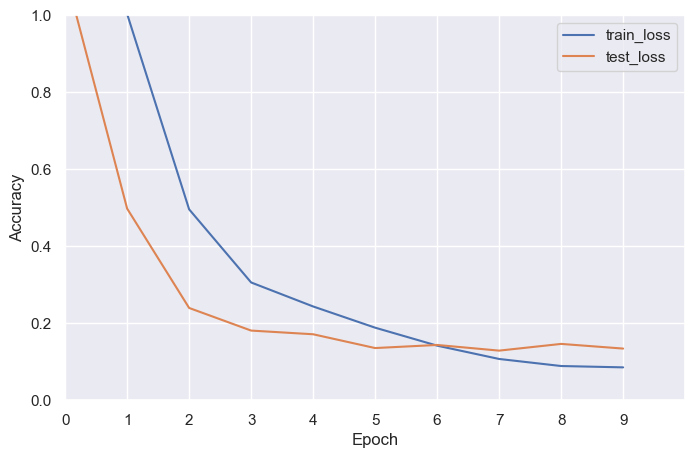

In [37]:
tf_accuracy = my_CNN.evaluate(X_test,  y_test, verbose=2)
print(f"Test accuracy for Logistic Regression is: {round(log_accuracy, 3)}")
print(f"Test accuracy for CNN is: {round(tf_accuracy[1], 3)}")
print("----"*20)

epochs = range(10)

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label = "test_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.xlim([0, 10])
plt.ylim([0, 1])
plt.legend(loc="upper right")
plt.show()

The dropout rate impact is obvious here. We do still overfit, but less faster than before: test loss goes above the training after 6 epochs now (instead of 3 previously). We will therefore include a dropout rate as a parameter of our pipeline.

#### **<font color=#ff7400> B.3 Pipeline configuration </font>**

In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocessing(data: pd.DataFrame) -> tuple:
    y = data["label"]
    X = data.drop(columns=["label"])
    square_root = int(np.sqrt(X.shape[1]))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = X_train_scaled.reshape(-1, square_root, square_root, 1)
    X_test_scaled = X_test_scaled.reshape(-1, square_root, square_root, 1)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [94]:
import tensorflow as tf
from tensorflow.keras import models, layers

def model(X_train, X_test, y_train, y_test, dropout_rate=0.1, nb_epochs=10):
    X_shape = X_train[0].shape
    nb_classes = len(np.unique(y_train))

    my_CNN = models.Sequential()
    my_CNN.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=X_shape))
    my_CNN.add(layers.MaxPooling2D((2, 2)))
    my_CNN.add(layers.Flatten())
    my_CNN.add(layers.Dense(32, activation="relu"))
    my_CNN.add(layers.Dropout(rate=dropout_rate))
    my_CNN.add(layers.Dense(nb_classes, activation="softmax"))

    cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    my_CNN.compile(optimizer='adam',
                loss=cross_entropy,
                metrics=['accuracy'])
    
    tf_history = my_CNN.fit(X_train, y_train, epochs=nb_epochs, validation_data=(X_test, y_test))
    tf_accuracy = my_CNN.evaluate(X_test,  y_test, verbose=2)

    return tf_accuracy, tf_history

In [103]:
def plot_loss(tf_accuracy, tf_history, nb_epochs):
    print(f"Test accuracy for CNN is: {round(tf_accuracy[1], 3)}")
    print("----"*20)

    epochs = range(nb_epochs)

    plt.figure(figsize=(8,5))
    plt.plot(tf_history.history["loss"], label="train_loss")
    plt.plot(tf_history.history["val_loss"], label = "test_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.xticks(epochs)
    plt.xlim([0, int(max(epochs))])
    plt.ylim([0, 1])
    plt.legend(loc="upper right")
    plt.show()

In [95]:
X_train, X_test, y_train, y_test = preprocessing(data=df)

In [96]:
tf_accuracy, tf_history = model(X_train, X_test, y_train, y_test, dropout_rate=0.2, nb_epochs=10)

/Users/julien/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/julien/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


394/394 - 1s - 3ms/step - accuracy: 0.0634 - loss: 2.3188
Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7974 - loss: 0.6425 - val_accuracy: 0.9562 - val_loss: 0.1549
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9434 - loss: 0.1875 - val_accuracy: 0.9671 - val_loss: 0.1285
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9584 - loss: 0.1386 - val_accuracy: 0.9676 - val_loss: 0.1305
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9634 - loss: 0.1174 - val_accuracy: 0.9731 - val_loss: 0.1176
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9709 - loss: 0.0931 - val_accuracy: 0.9764 - val_loss: 0.1161
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9737 - loss: 0.0847 - val_accuracy: 0.9752 - val_loss: 0.1246
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9782 - loss: 0.0717 - val_accuracy: 0.9754 - val_loss: 0.1261
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms

Test accuracy for CNN is: 0.371
--------------------------------------------------------------------------------


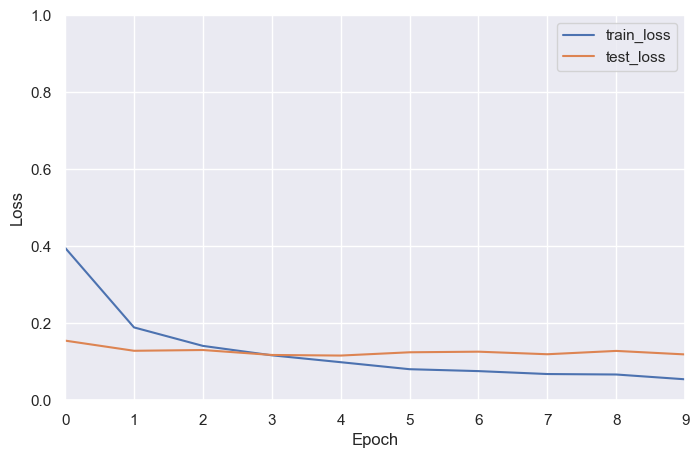

In [104]:
plot_loss(tf_accuracy, tf_history, nb_epochs=10)